### Importing libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading csv file

In [5]:
comcast_df= pd.read_csv(r'C:\Users\Admin\OneDrive\Documents\vs code\comcast_telecom_complaint_dataset\Comcast_telecom_complaints_data.csv')
comcast_df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [6]:
comcast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


### Changing the date type of 'Date_month_year' column

In [7]:
comcast_df['Date_month_year']=pd.to_datetime(comcast_df['Date_month_year'])

In [8]:
comcast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   object        
 3   Date_month_year              2224 non-null   datetime64[ns]
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
m

### Adding a new column, for month

In [9]:
comcast_df['Month']=comcast_df['Date_month_year'].dt.month

### Provide the trend chart for the number of complaints at monthly and daily granularity levels

#### 1. Month wise number of complaints

<AxesSubplot: xlabel='Month', ylabel='count'>

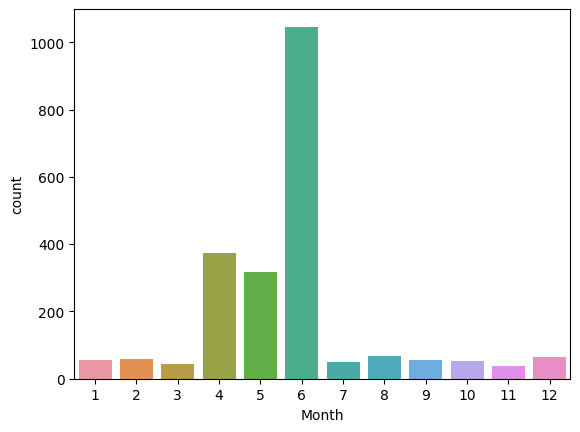

In [10]:
sns.countplot(x='Month', data=comcast_df)


##### 2. Chart showing number of complaints on a daily basis 

<AxesSubplot: >

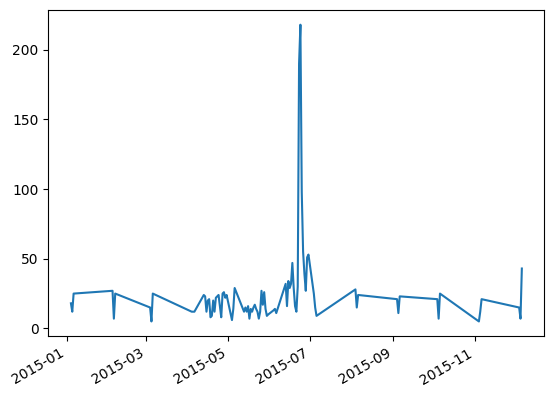

In [11]:
comcast_df['Date_month_year'].value_counts().plot()

### Making a wordcloud to check the frequency level of different types of complaints

In [12]:
comcast_df['type_of complaints']= comcast_df['Customer Complaint'].str.lower()
freq_table= comcast_df['type_of complaints'].value_counts().to_frame()
freq_table.head()

,type_of complaints
comcast,102
comcast data cap,30
comcast internet,29
comcast data caps,21
comcast billing,18


In [13]:
! pip install wordcloud
from wordcloud import WordCloud, STOPWORDS


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


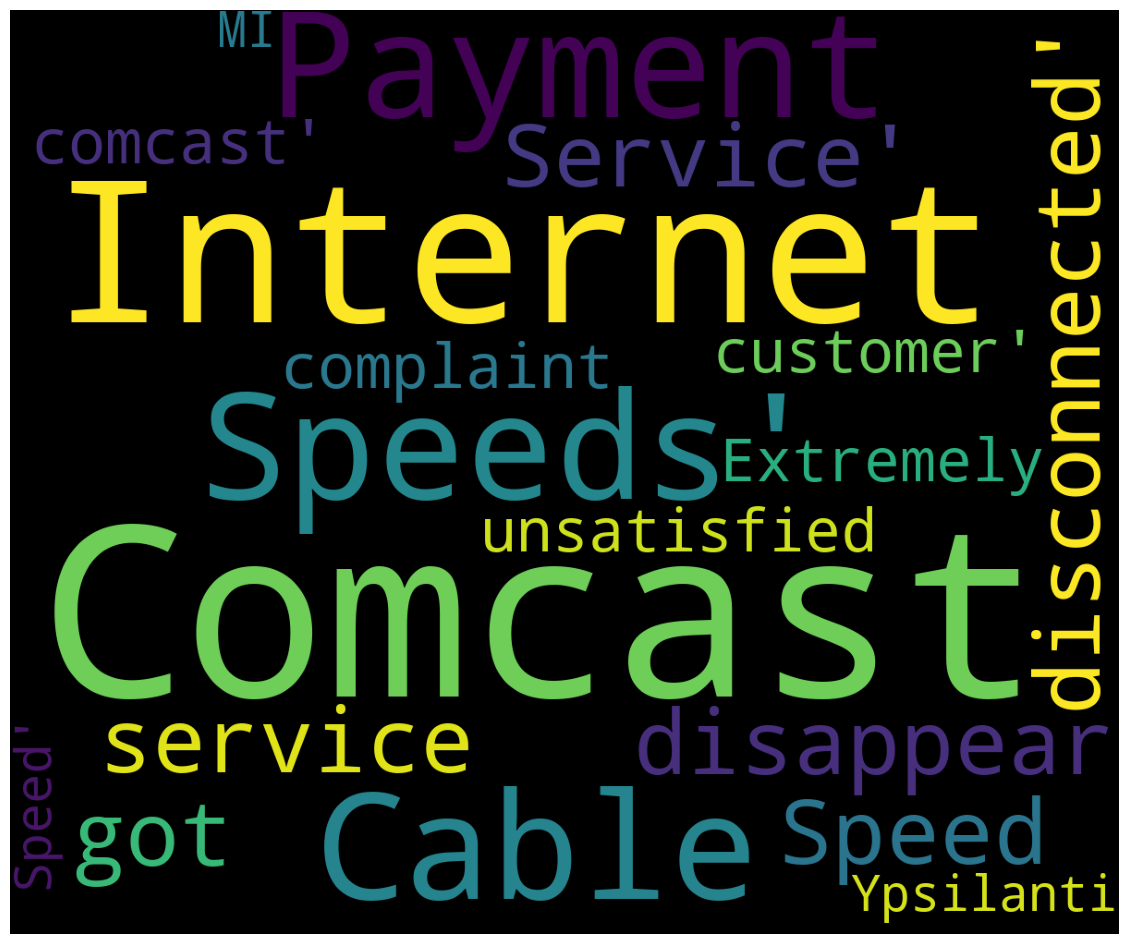

In [14]:
txt = comcast_df["Customer Complaint"].values
wc = WordCloud(width=1200, height=1000, background_color="black",stopwords=STOPWORDS).generate(str(txt))
fig = plt.figure(figsize=(20,12))
plt.imshow(wc)
plt.axis("off")
plt.show()


##### Most complaints are about intrernet

### Creating a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed

In [15]:
comcast_df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [16]:
comcast_df['newstatus']=['open' if Status=='Open' or Status=='Pending' else 'Closed' for Status in comcast_df["Status"]]

###### Following code should be used when we wish to make changes to the same column, but not to be used if the previous values of the column are still of use  

In [17]:
#comcast_df['Status']=comcast_df['Status'].map({'Pending':'Open','Solved':'Closed','Open':'Open','Closed':'Closed'})

In [18]:
comcast_df['newstatus'].unique()

array(['Closed', 'open'], dtype=object)

In [19]:
comcast_df.groupby(['State']).size().sort_values(ascending=False).head(5)

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
dtype: int64

#### Georgia has the maximum number of complaints

### Providing state wise status of complaints in a stacked bar chart. 

In [20]:
Statewise_complaints=comcast_df.groupby(['State','newstatus']).size().unstack().fillna(0)
Statewise_complaints.head(3)

newstatus,Closed,open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0


<AxesSubplot: ylabel='State'>

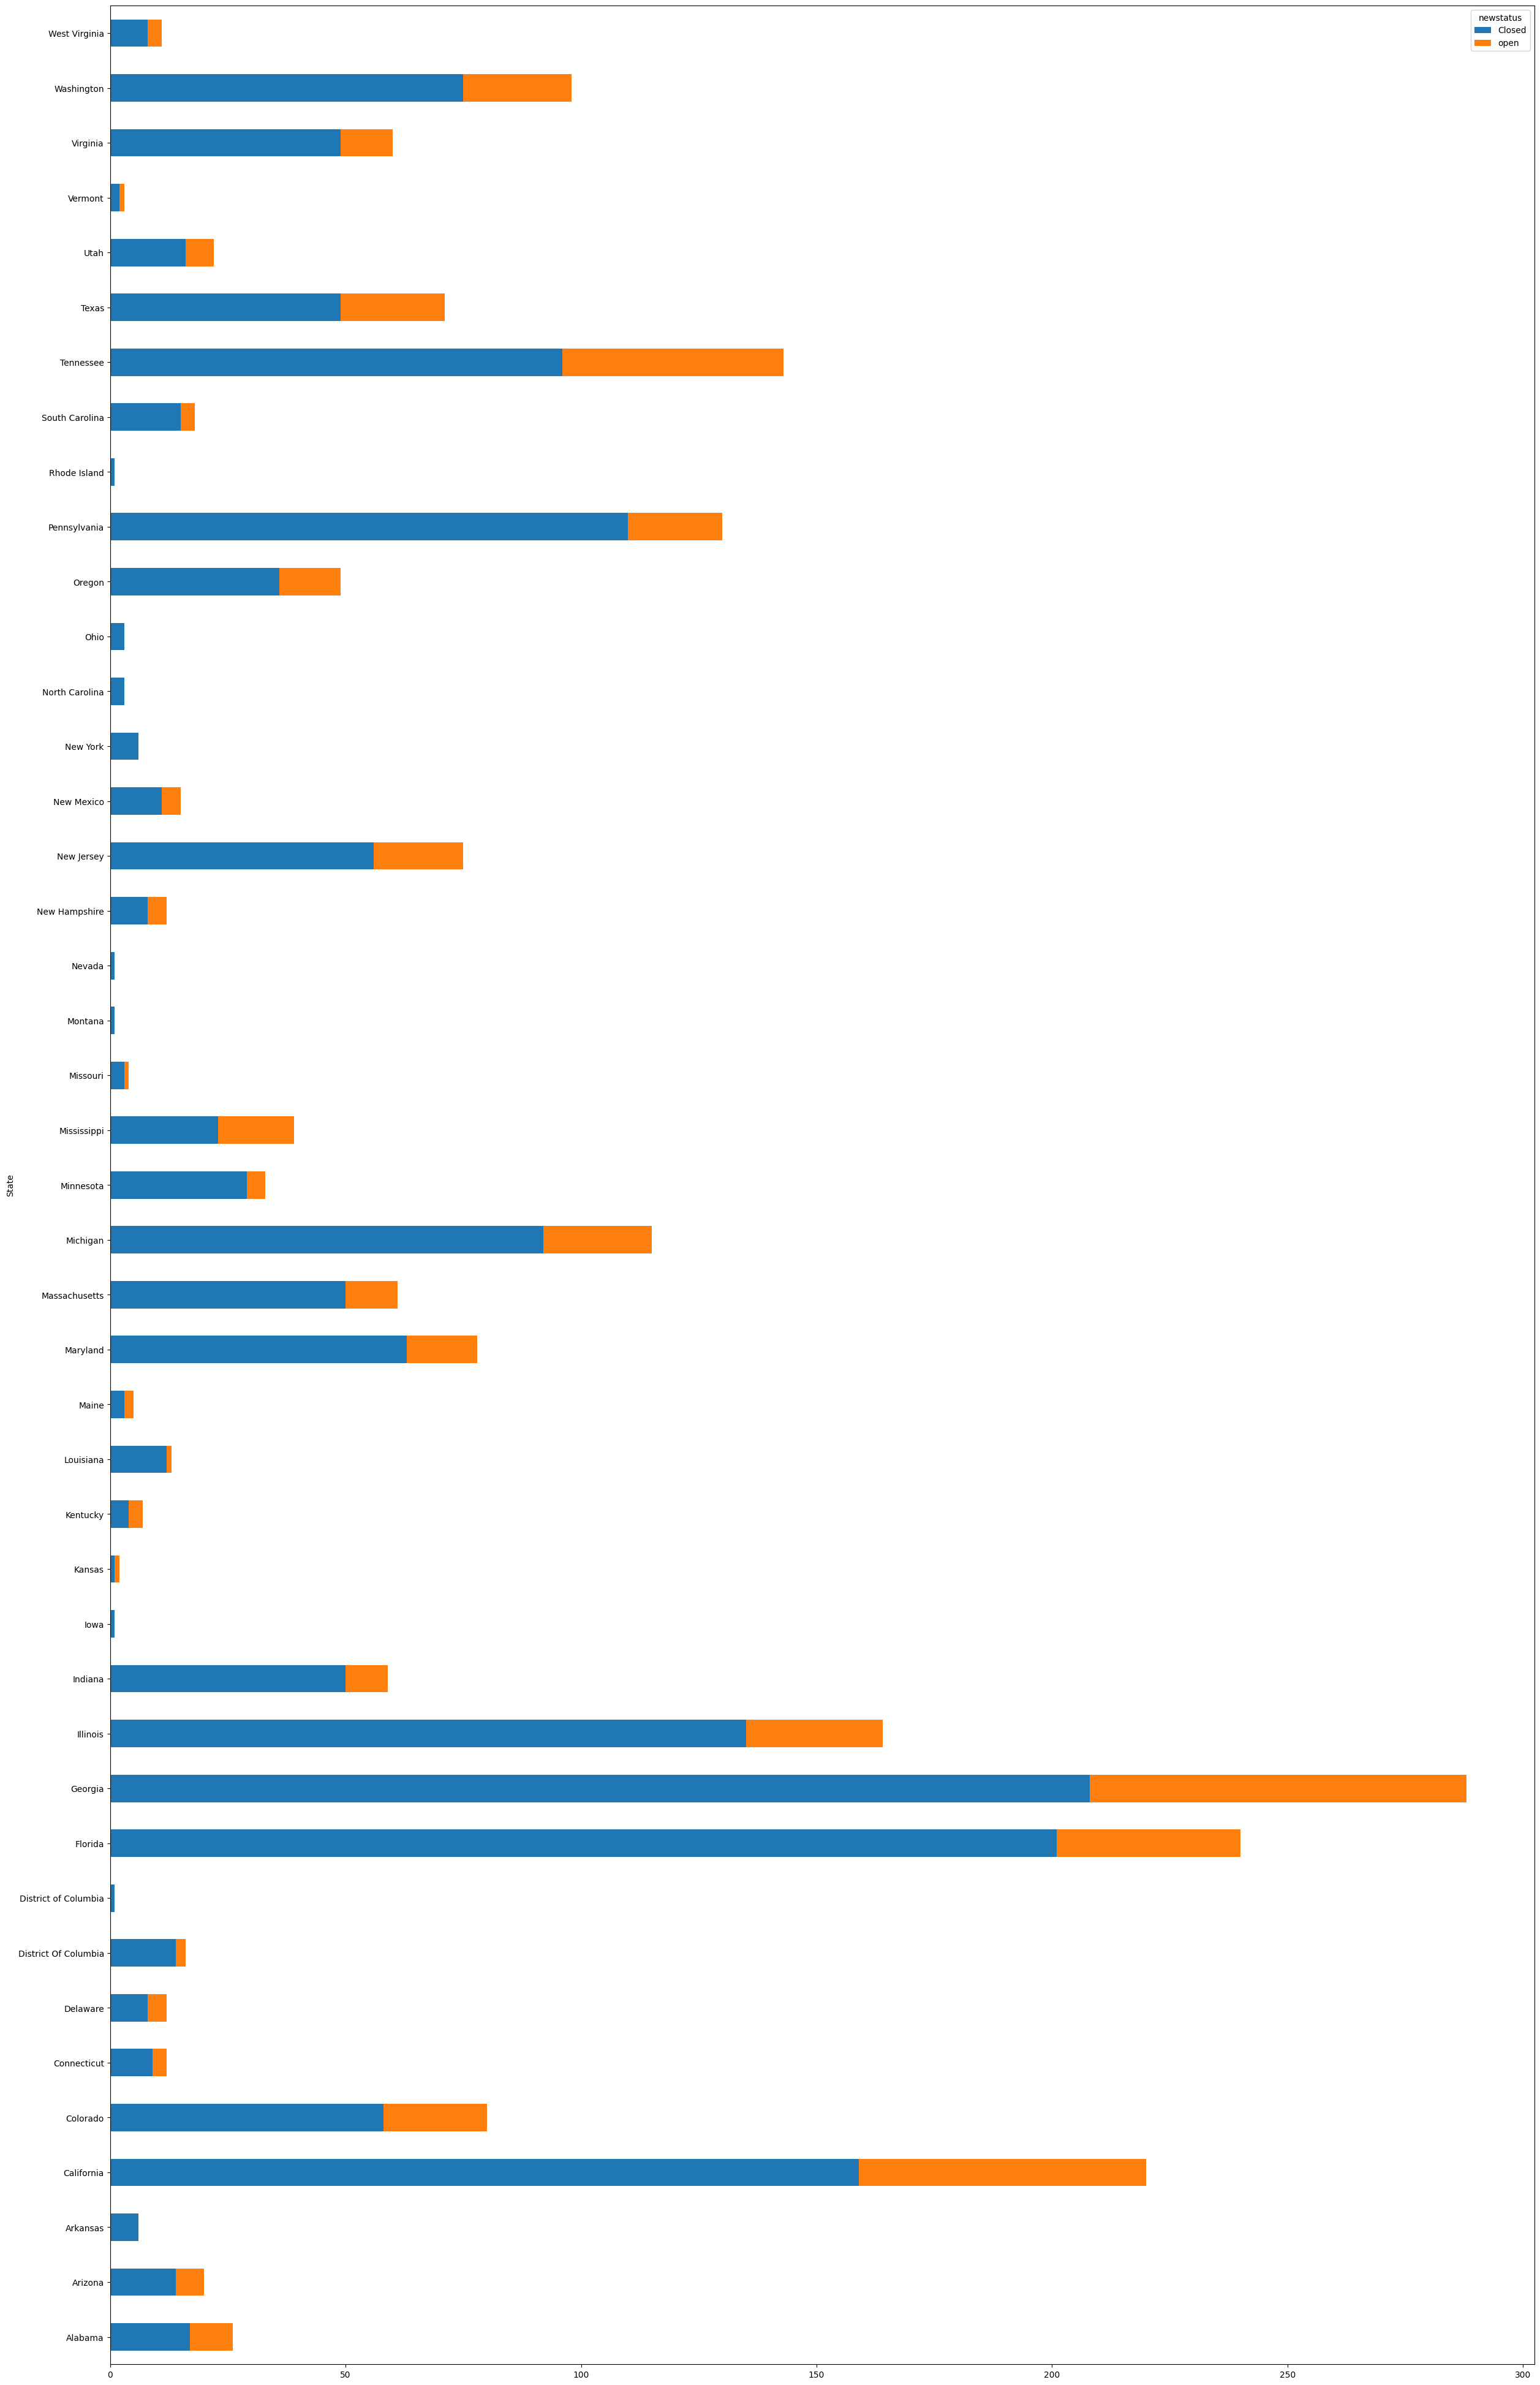

In [21]:
Statewise_complaints.plot(kind='barh',figsize=(30,50),stacked=True)


### Finding which state has the highest percentage of unresolved complaints

In [22]:
Statewise_complaints['unresolved complaints']=(Statewise_complaints['open']/(Statewise_complaints['open'] + Statewise_complaints['Closed'])*100)


In [23]:
Statewise_complaints['unresolved complaints'].sort_values(ascending=False).head(10)

State
Kansas           50.000000
Kentucky         42.857143
Mississippi      41.025641
Maine            40.000000
Alabama          34.615385
Vermont          33.333333
Delaware         33.333333
New Hampshire    33.333333
Tennessee        32.867133
Texas            30.985915
Name: unresolved complaints, dtype: float64

#### Kansas state has the highest percentage of unresolved complaints

### Finding the percentage of complaints (resolved till date), which were received through the Internet and customer care calls

In [29]:
#comcast_df[comcast_df['State']== 'Kansas'].value_counts('Status')

Status
Closed     1
Pending    1
dtype: int64

In [25]:
cr = comcast_df.groupby(['Received Via','newstatus']).size().unstack().fillna(0)
cr


newstatus,Closed,open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [26]:
comcast_df['Received Via'].value_counts()

Customer Care Call    1119
Internet              1105
Name: Received Via, dtype: int64

In [27]:
(comcast_df['newstatus'] == 'Closed').value_counts()

True     1707
False     517
Name: newstatus, dtype: int64

In [28]:
cr['resolved'] = cr['Closed']/cr['Closed'].sum()*100
cr['resolved']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64